In [ ]:
# 🌍 SDG 13: Predicting CO₂ Emissions using Machine Learning

This project uses supervised machine learning to forecast CO₂ emissions based on GDP and population data.  
It aligns with the UN Sustainable Development Goal 13 – **Climate Action**.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

%matplotlib inline


In [3]:
df = pd.read_csv("co2_data.csv")  # Ensure the CSV is in the same folder
df.head()


,Country,Year,GDP,Population,CO2_Emissions
0,Kenya,2020,95.5,53.8,16.2
1,India,2020,2626.0,1380.0,2440.0
2,USA,2020,21138.0,331.0,5000.0
3,Germany,2020,3845.6,83.2,701.0
4,Brazil,2020,1444.7,212.6,456.0


In [4]:
# Remove rows with missing values (if any)
df = df.dropna()

# Define features and target variable
X = df[['GDP', 'Population']]   # Inputs
y = df['CO2_Emissions']         # Output/Target


In [5]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 2812.16
R² Score: -39.58


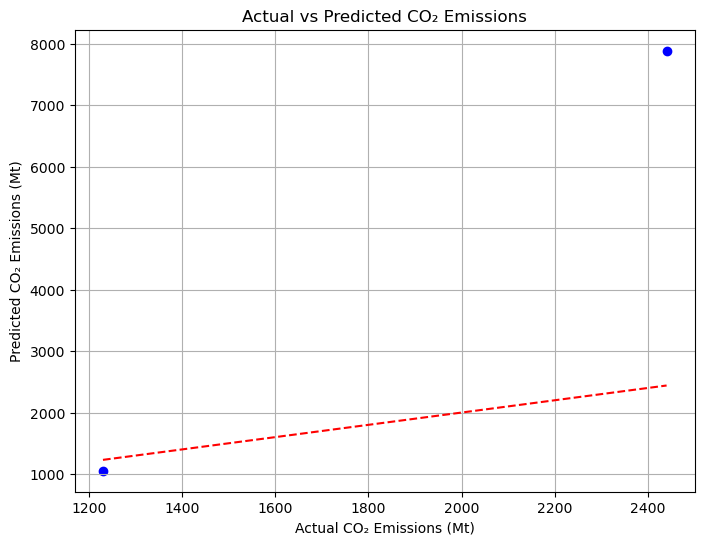

In [7]:
# Plot actual vs predicted CO2 emissions
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual CO₂ Emissions (Mt)")
plt.ylabel("Predicted CO₂ Emissions (Mt)")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.grid(True)
plt.show()


## 🤔 Ethical Considerations

- **Bias**: Some countries may underreport emissions or lack recent data, which could reduce the accuracy and fairness of predictions.
- **Fairness**: It's important to include a diverse and representative global dataset to avoid bias toward wealthier or more industrialized nations.
- **Sustainability**: Forecasting emissions can support long-term climate policy and energy transition planning.
- **Future Improvements**:
  - Include renewable energy percentage or policy variables for better context.
  - Experiment with models like Random Forest for improved accuracy and feature analysis.
